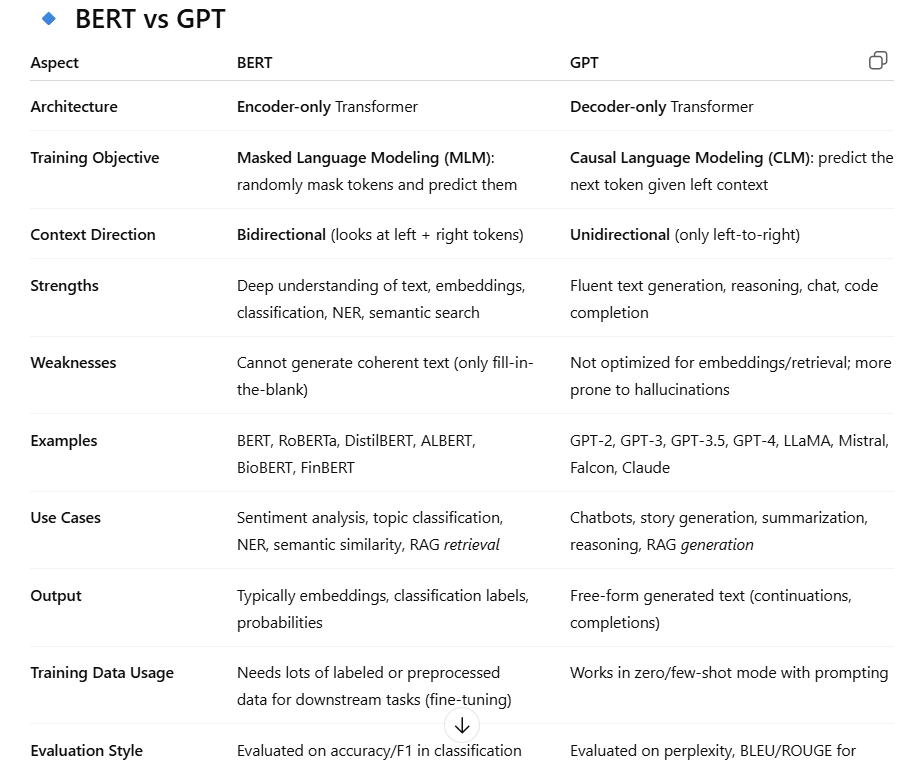

In [ ]:
# prompt: proper chatbot using Llama and langchain

import torch
from transformers import AutoTokenizer, AutoModelForCausalLM, pipeline, BitsAndBytesConfig
import gradio as gr
from langchain.llms import HuggingFacePipeline
from langchain import PromptTemplate, LLMChain

bnb_config = BitsAndBytesConfig(load_in_4bit=True,
                                bnb_4bit_use_double_quant=True,
                                bnb_4bit_quant_type='nf4',
                                bnb_4bit_compute_dtype=torch.bfloat16)

model_name = "C:\\Abhishek_Data\\Models\\Transformer_compatible\\Llama-3.2-3B-Instruct"

model = AutoModelForCausalLM.from_pretrained(
    model_name,
    quantization_config=bnb_config,
    device_map='auto')

tokenizer = AutoTokenizer.from_pretrained(model_name)
tokenizer.pad_token = tokenizer.eos_token

pipeline = pipeline(task='text-generation', model=model, tokenizer=tokenizer, max_new_tokens=1024)

# Create LangChain LLM from Hugging Face pipeline
llm = HuggingFacePipeline(pipeline=pipeline)

# Create a prompt template
template = """Question: {question}

Answer:"""
prompt = PromptTemplate(template=template, input_variables=["question"])

# Create an LLM chain
llm_chain = LLMChain(prompt=prompt, llm=llm)

'''
# Run the LLM chain
question = "What is Machine Learning"
response = llm_chain.invoke(question)
response
'''

def chatbot(input_text):
  response = llm_chain.invoke(input_text)
  return response['text']


iface = gr.Interface(
    fn=chatbot,
    inputs=gr.Textbox(lines=2, placeholder="Enter your question here..."),
    outputs="text",
    title="Llama 3.2 Chatbot",
    description="Ask me anything!"
)

iface.launch()


c:\Users\Abhishek\anaconda3\envs\pytorch-gpu\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Loading checkpoint shards: 100%|██████████| 2/2 [00:03<00:00,  1.91s/it]
Device set to use cuda:0
C:\Users\Abhishek\AppData\Local\Temp\ipykernel_19576\4033398801.py:27: LangChainDeprecationWarning: The class `HuggingFacePipeline` was deprecated in LangChain 0.0.37 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFacePipeline``.
  llm = HuggingFacePipeline(pipeline=pipeline)
C:\Users\Abhishek\AppData\Local\Temp\ipykernel_19576\4033398801.py:36: LangChainDeprecationWarning: The class `LLMChain` was deprecated 

* Running on local URL:  http://127.0.0.1:7860
* To create a public link, set `share=True` in `launch()`.


Prompting techniques: https://www.analyticsvidhya.com/blog/2024/10/17-prompting-techniques-to-supercharge-your-llms/